# Chebyshev center

Find the center and radius of the smallest sphere that can be inscribed in the polyhedron defined by the inequalities
$$ \left\{ 2 x - y + 2 z \le 2,\,
-x + 2 y + 4 z \le 16,\,
x + 2 y - 2 z \le 8,\,
x \ge 0,\,
y \ge 0,\,
z \ge 0 \right\}$$

i.e., $AX \leq b$, where

$X = [x; y; z]$ and

$$
A = 
\left[
\begin{array}{rrr}
2 & -1 & 2\\
-1 & 2 & 4 \\
1 & 2 & -2 \\
-1 & 0 & 0 \\
0 & -1 & 0 \\
0 & 0 & -1
\end{array}
\right], \qquad
b =
\left[
\begin{array}{c}
2\\
16\\
8\\
0\\
0\\
0
\end{array}
\right]
$$


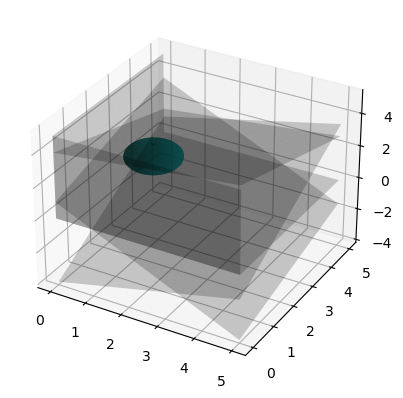

The coordinates of the Chebyshev center are: [0.75, 3.25, 0.7500000000000001]
The largest possible radius is: 0.7500000000000001
Coin0506I Presolve 6 (0) rows, 4 (0) columns and 18 (0) elements
Clp0006I 0  Obj 0 Dual inf 0.45063792 (1)
Clp0006I 5  Obj 0.75
Clp0000I Optimal - objective value 0.75
Clp0032I Optimal objective 0.75 - 5 iterations time 0.012


In [1]:
using JuMP
using Clp
using PyPlot
using LinearAlgebra

A = [2 -1 2;-1 2 4;1 2 -2;-1 0 0;0 -1 0;0 0 -1]
b = [2; 16; 8; 0; 0; 0]

m = Model(Clp.Optimizer)
@variable(m, r >= 0)           # radius
@variable(m, x[1:3]) # coordinates of center
for i = 1:size(A,1)
    @constraint(m, dot(A[i,:],x) + r*norm(A[i,:]) <= b[i])
end
@objective(m, Max, r)     # maximize radius

optimize!(m)

xc,yc,zc = JuMP.value.(x)
r = JuMP.objective_value(m)
println("The coordinates of the Chebyshev center are: ",[xc,yc,zc])
println("The largest possible radius is: ", r)



# Plot Optimal Sphere
θ = range(0,stop=2*π,length=100)'
ϕ = range(0,stop=π,length=100)
x = xc .+ r.*sin.(ϕ).*cos.(θ)
y = yc .+ r.*sin.(ϕ).*sin.(θ)
z = zc .+ r.*ones(1,100).*cos.(ϕ) 
plot_surface(x, y, z, color="c", rstride=1, cstride=1, linewidth=0, alpha=0.80)

# Plot 3D Planes
x = range(0,stop=5,length=100)'
y = range(0,stop=5,length=100)
for i = 1:size(A,1) 
    if A[i,3]!=0
        xx = repeat(x, 100, 1)
        yy = repeat(y, 1, 100)
        zz = (b[i]*ones(100,100)- A[i,1]*xx - A[i,2]*yy)/A[i,3] 
        plot_surface(xx, yy, zz, rstride=2, cstride=2, linewidth=0, alpha=0.20 , shade=true, color="k")
    elseif A[i,1]!=0
        yy = repeat(y, 1, 100)
        zz = repeat(x, 100, 1)
        xx = (b[i]*ones(100,100) - A[i,2]*yy)/A[i,1] 
        plot_surface(xx, yy, zz, rstride=2, cstride=2, linewidth=0, alpha=0.20 , shade=true, color="k")
    else
        xx = repeat(x, 100, 1)
        zz = repeat(y, 1, 100)
        yy = b[i]*ones(100,100)/A[i,2] 
        plot_surface(xx, yy, zz, rstride=2, cstride=2, linewidth=0, alpha=0.20 , shade=true, color="k")
    end
end